In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
r = 0.05  # wheel radius in meters
L = 0.2   # distance between wheels in meters
dt = 0.1  # time step in seconds

# Initial conditions
x, y, theta = 0, 0, 0  # initial position and orientation

In [73]:
# Function to update robot's position using odometry
def update_position(x, y, theta, omega_l, omega_r, r, L, dt):
    # Compute linear and angular velocities
    v = (r / 2) * (omega_r + omega_l)
    omega = (r / L) * (omega_r - omega_l)
    
    # Update position and orientation
    x_new = x + v * np.cos(theta) * dt
    y_new = y + v * np.sin(theta) * dt
    theta_new = theta + omega * dt
    
    return x_new, y_new, theta_new

# Simulate motion for 100 seconds
def simulate_motion(x, y, theta, dt):
    positions = [(x, y)]
    omega_l = 3.0  # constant angular velocity for left wheel
    omega_r = 1.0  # constant angular velocity for right wheel (modify these to test)

    for _ in range(int(100 / dt)):
        x, y, theta = update_position(x, y, theta, omega_l, omega_r, r, L, dt)
        positions.append((x, y))

    return positions

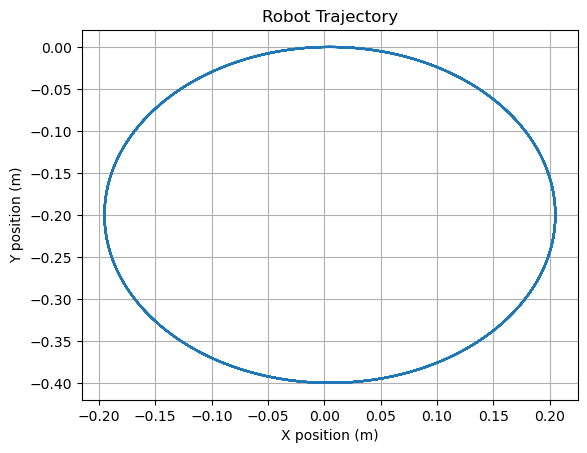

In [75]:
# Run simulation
positions = simulate_motion(x, y, theta, dt)

# Extract x and y coordinates for plotting
x_coords, y_coords = zip(*positions)

# Plot the trajectory
plt.plot(x_coords, y_coords)
plt.title('Robot Trajectory')
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.grid(True)
plt.show()
